![Insper](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true)

### Programa Avançado em Data Science e Descisão

### Projeto Integrador

**Autores:**    
- Carolina Felix Costrino
- Eduardo Aguirra de Oliveira
- Joao Claudio Miranda de Souza


### Contexto

Entre 2005 e 2016 a consultoria Bisnode, do ramo de *business information*, coletou dados financeiros de empresas européias de diversos segmentos.

### Objetivo

Este trabalho tem como objetivo desenvolver uma análise preditiva capaz de predizer se uma empresa irá encerrar suas atividades futuramente.

### Requisitos
- Observações referêntes ao ano de 2016 deverão ser desconsiderados.
- Deverão ser consideradas apenas empresas ativas no ano de 2012.
- Deverão ser consideradas apenas empresas cuja receita esteja entre 1.000 e 10 milhões EUR ano.
- Todo o pré-processamento dos dados deverá ser realizado através da linguagem **Python**, sendo permitidas as bilbiotecas:
1. Pandas
2. Numpy
3. Dfply
4. Missingno
5. Matplotlib
6. Hvplot
- O modelo preditivo, bem como sua segmentação entre treinamento e teste deverão ser realizados através da linguagem **R**

### Premissas Adotadas.
- Será considerada como encerrada, empresas que não apresentem vendas no período de 2 anos consecutivos.
- Poderá ser aplicado o logaritmo em variáveis que apresentem alta taxa de assimetria.
- Poderá ser desconsiderada variáveis com alta taxa de valores faltantes (*missing*).ficação.

## Análise Exploratória:

Importando as bibliotecas Python que serão usadas para a análise

In [61]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

Criando o *data frame* (df) pandas com os dados financeiros

In [62]:
#caminho baseado no caminho do tester
df = pd.read_csv('/content/cs_bisnode_panel (1).csv')

#### Primeiras Avaliações do Data Frame
Primeiramente vamos realizar uma avaliação geral dos dados, como:
1. Valores Minimo, Máximo e Media, etc
2. Tipo de dados trabalhados.
3. Verificar correlação entre as variáveis
4. Volume e percentual de variáveis faltantes (*missing*).


In [63]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
count,2.878290e+05,287829,287829,1.825700e+04,2.797890e+05,2.876980e+05,2.876980e+05,2.693000e+05,2.693000e+05,2.706260e+05,1.748500e+04,2.876980e+05,2.803920e+05,2.876890e+05,2.876980e+05,2.876980e+05,2.797890e+05,1.825700e+04,1.825700e+04,2.797890e+05,2.779450e+05,2.803920e+05,2.876980e+05,2.876980e+05,2.863590e+05,1.798300e+04,0.0,287829.000000,287829.000000,287829.000000,287829.000000,231372.000000,38859.000000,231402.000000,231402.000000,231402.000000,176011.000000,231402.000000,231402,231402,286791.000000,286791.000000,278060.000000,287829.000000,286989,287778,56180,141297.000000
unique,NaN,3411,1738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,3,6362,2602,NaN
top,NaN,2014-01-01,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,Domestic,NaN,NaN,NaN,NaN,Central,1991-12-30,2015-05-27,NaN
freq,NaN,25913,28077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160553,201182,NaN,NaN,NaN,NaN,172906,652,191,NaN
mean,1.540862e+11,NaN,NaN,4.601683e+05,2.353264e+04,2.209395e+05,1.742499e+05,1.521749e+03,3.754458e+03,2.229149e+03,1.056481e+05,3.393731e+05,2.332423e+04,3.782416e+04,6.052729e+04,4.098719e+04,3.594648e+05,2.118066e+06,3.368463e+06,9.229396e+04,5.152337e+03,5.042513e+05,2.350564e+05,7.741440e+04,2.216273e+05,6.554714e+05,NaN,0.013327,345.584719,0.100237,2010.570356,2002.177545,2013.950102,1.254038,0.115653,0.255157,1964.902661,3205.323629,NaN,NaN,4858.231479,48.353062,2.692023,2.067075,NaN,NaN,NaN,1.009435
std,1.382424e+11,NaN,NaN,2.614149e+06,8.216668e+05,4.182020e+06,3.730357e+06,7.237342e+04,1.727794e+05,1.611169e+05,5.338053e+05,1.823176e+07,2.413799e+06,6.260181e+06,6.670054e+05,6.602564e+05,2.940907e+06,6.746671e+06,1.135202e+07,7.058337e+05,1.892475e+06,3.861890e+06,7.465366e+06,1.746095e+06,2.580851e+06,1.725947e+06,NaN,0.114673,65.537706,0.300316,3.180848,6.931043,2.160074,0.517837,0.308518,0.406538,11.546875,1880.553038,NaN,NaN,1250.012437,12.570550,0.512269,0.847473,NaN,NaN,NaN,4.771655
min,1.001034e+06,NaN,NaN,-8.445704e+05,-3.076704e+05,-5.555556e+05,-7.727111e+05,-4.902703e+05,-2.744074e+05,-6.181263e+06,0.000000e+00,-2.394226e+06,-3.355148e+08,-3.770370e+03,-3.069630e+04,-5.555556e+05,-1.239974e+07,-8.458481e+05,-1.470007e+07,-4.338074e+05,-3.355148e+08,-1.472559e+07,-4.210445e+07,-5.555556e+05,-2.390456e+06,-1.825248e+06,NaN,0.000000,0.000000,0.000000,2005.000000,1950.000000,1997.000000,1.000000,0.000000,0.000000,1920.000000,1.000000,NaN,NaN,111.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000
25%,2.868635e+10,NaN,NaN,0.000000e+00,3.333333e+01,2.203704e+03,1.833333e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.388889e+03,0.000000e+00,0.000000e+00,3.370370e+02,3.433333e+03,1.775926e+04,0.000000e+00,4.888889e+02,-3.270370e+03,5.295370e+03,-4.533333e+03,1.851852e+03,0.000000e+00,3.500000e+03,NaN,0.000000,364.000000,0.000000,2008.000000,1996.000000,2013.000000,1.000000,0.000000,0.000000,1956.000000,1775.000000,NaN,NaN,3314.000000,33.000000,2.000000,1.000000,NaN,NaN,NaN,0.090909
50%,1.152850e+11,NaN,NaN,7.040741e+03,7.814815e+02,9.592593e+03,1.049259e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.825926e+03,7.037037e+01,0.000000e+00,4.555555e+02,1.851852e+03,2.361481e+04,

In [64]:
#Visualizando o data frame
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,NaN,1229.629639,218.518524,0.0,4355.555664,2911.111084,38222.222656,NaN,NaN,22222.222656,62.962963,62751.851562,881.481506,1388.888916,1229.629639,NaN,NaN,0,364,0,2005,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,NaN,725.925903,996.296326,0.0,7225.925781,5896.296387,38140.742188,NaN,NaN,23844.445312,755.555542,64625.925781,1637.036987,1388.888916,725.925903,NaN,NaN,0,364,0,2006,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,NaN,1322.222168,570.370361,0.0,7951.852051,177.777771,40174.074219,NaN,NaN,22262.962891,0.000000,65100.000000,1633.333374,1388.888916,1322.222168,NaN,NaN,0,364,0,2007,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,NaN,1022.222229,714.814819,0.0,5233.333496,1392.592651,54274.074219,NaN,NaN,21107.408203,0.000000,78085.187500,1725.925903,1481.481445,1022.222229,NaN,NaN,0,365,0,2008,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,NaN,814.814819,-11044.444336,0.0,3259.259277,11.111111,41755.554688,NaN,NaN,13237.037109,-11074.074219,45388.890625,-9348.148438,1481.481445,814.814819,NaN,NaN,0,364,0,2009,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


In [65]:
# Obtendo o número de linhas e colunas do df
linhas, colunas = df.shape
print(f"O DataFrame tem {linhas} linhas e {colunas} colunas.")

O DataFrame tem 287829 linhas e 48 colunas.


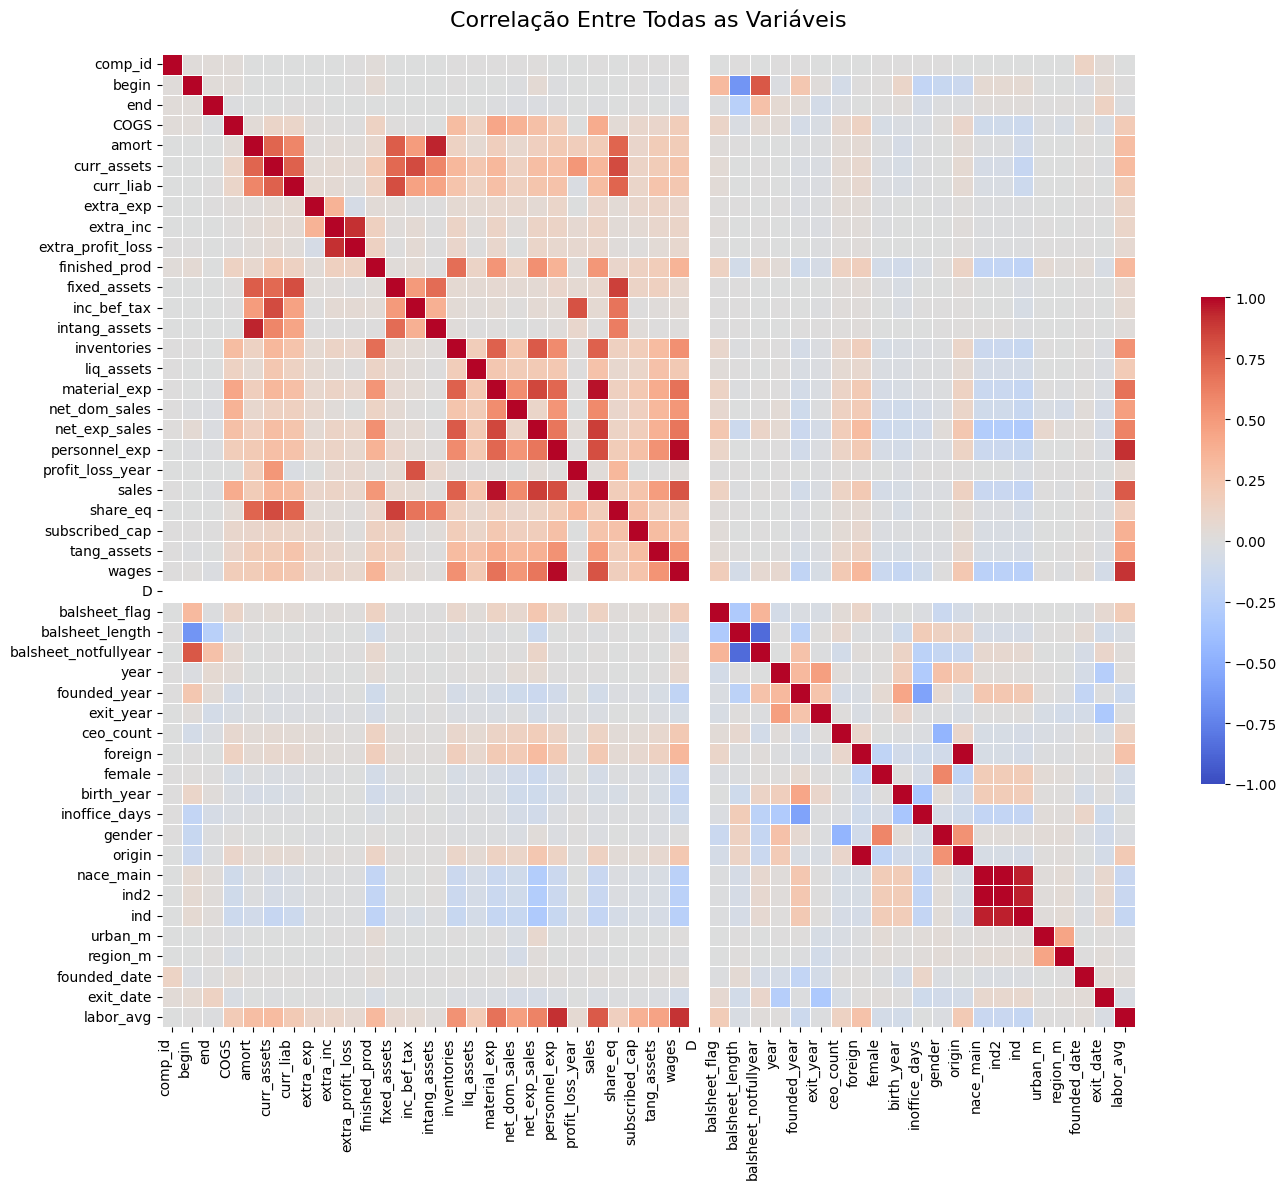

In [66]:
# Fazendo um gráfico de correlação das variáveis

# Função para calcular a correlação entre todas as colunas
def mixed_correlation(df):
    # Cria uma cópia do DataFrame para não modificar o original
    df_corr = df.copy()

    # Codifica variáveis categóricas
    for column in df_corr.select_dtypes(include=['object', 'category']):
        df_corr[column] = pd.factorize(df_corr[column])[0]
    corr = df_corr.corr()
    return corr

heatMapCorr = mixed_correlation(df)

plt.figure(figsize=(15, 12))

heatmap = sns.heatmap(heatMapCorr,
                      annot=False,
                      cmap='coolwarm',
                      vmin=-1, vmax=1,
                      center=0,
                      square=True,
                      linewidths=.5,
                      cbar_kws={"shrink": .5})

plt.title('Correlação Entre Todas as Variáveis', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Nota-se uma grande correlação entre as variáveis financeiras e uma correlação perto de 1 entre nace_main,ind2 e ind como esperado, pois o dicionário de variaveis já informa que uma é a agregação da outra.

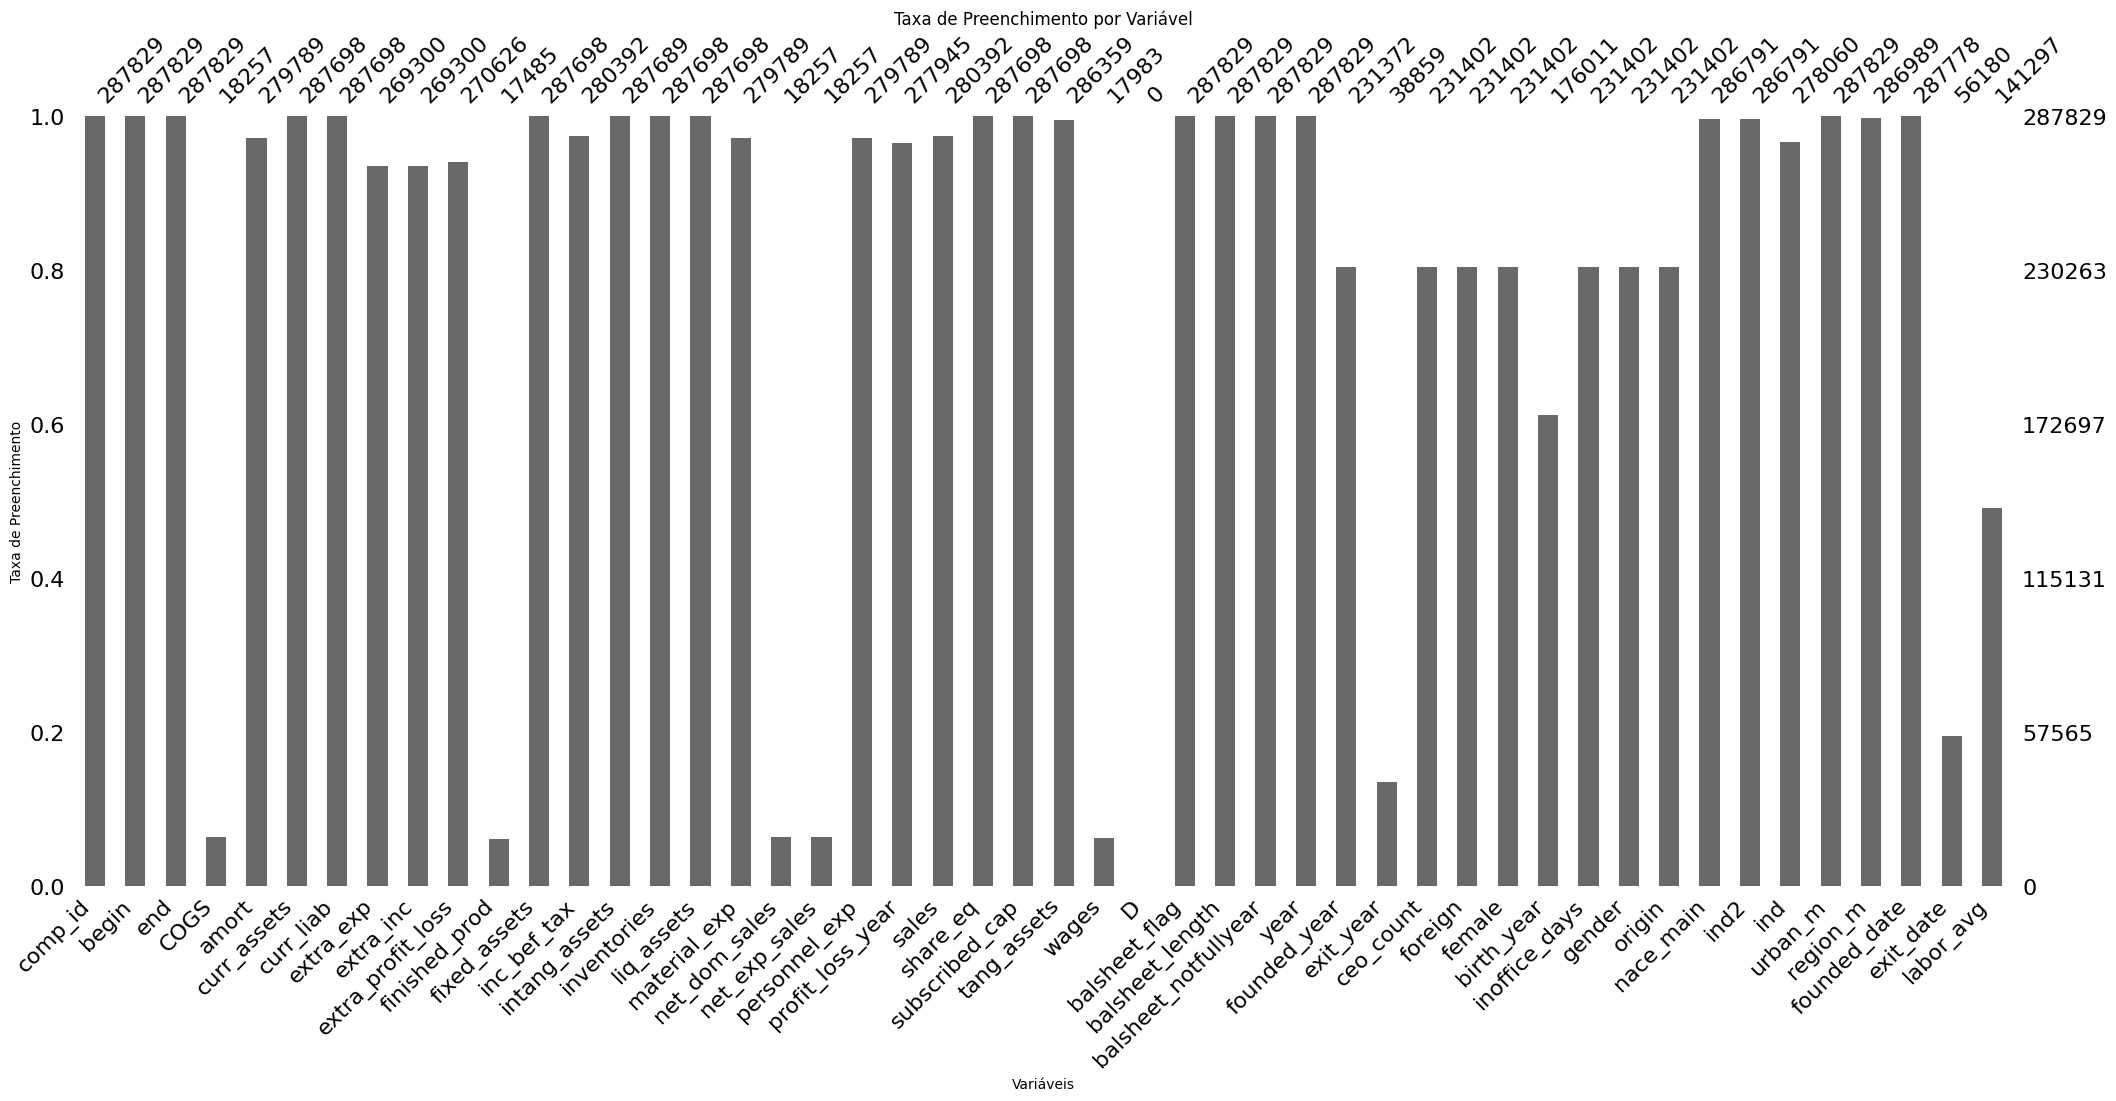

In [67]:
# Visualizando os dados faltantes
plt.figure(figsize=(20, 12))
plt.title('Taxa de Preenchimento por Variável')
plt.xlabel('Variáveis')
plt.ylabel('Taxa de Preenchimento')
msno.bar(df)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
#Verificando os dados NaN e os tipos de dados
def check_nan_all_columns(df):
    # Calcula a contagem de NaN
    contagem_nan = df.isnull().sum()
    # Calcula o percentual de NaN
    porcentagem_nan = 100 * df.isnull().sum() / len(df)
    # Combina as duas séries em um DataFrame
    nan_summary = pd.concat([contagem_nan, porcentagem_nan], axis=1, keys=['contagem_nan', 'porcentagem_nan'])
    # Arredonda o percentual para duas casas decimais
    nan_summary['porcentagem_nan'] = nan_summary['porcentagem_nan'].round(2)
    # Ordena o DataFrame pela contagem de NaN em ordem decrescente
    nan_summary = nan_summary.sort_values('contagem_nan', ascending=False)
    # Adiciona o sufixo '%' à coluna de percentual
    nan_summary['porcentagem_nan'] = nan_summary['porcentagem_nan'].astype(str) + '%'
    nan_summary['Dtype'] = df.dtypes
    return nan_summary

print(check_nan_all_columns(df))

                      contagem_nan porcentagem_nan    Dtype
D                           287829          100.0%  float64
finished_prod               270344          93.93%  float64
wages                       269846          93.75%  float64
COGS                        269572          93.66%  float64
net_exp_sales               269572          93.66%  float64
net_dom_sales               269572          93.66%  float64
exit_year                   248970           86.5%  float64
exit_date                   231649          80.48%   object
labor_avg                   146532          50.91%  float64
birth_year                  111818          38.85%  float64
founded_year                 56457          19.61%  float64
origin                       56427           19.6%   object
female                       56427           19.6%  float64
ceo_count                    56427           19.6%  float64
foreign                      56427           19.6%  float64
inoffice_days                56427      

Após observar o gráfico e obetr as porcentagens de missing optamos por excluir as colunas com missing acima de 80% para que os valores faltantes não se tornassem um ruído no modelo de predição. As colunas retiradas foram: D, finished_prod, wages, COGS, net_dom_sales, net_exp_sales, exit_date, exit_year.

In [69]:
df = df.drop(columns=['D','COGS','finished_prod','net_dom_sales','net_exp_sales','wages','exit_date','exit_year'])

#### Tratamento de Informações Faltantes e Novas Vairáveis:

### Preenchendo a coluna founded_year

Com a análise anterior, podemos perceber que a coluna founded_year apresenta um valor considerável de missings, porém essa coluna pode ser facilmente preenchida com os dados da coluna founded_date. Com isso garantimos que essa coluna estja completa, para posteriormente ter a idade da empresa calculada.
Para isso, precisamos primeiro garantir que os dados estão no formato corrteo, Sendo assim, iremos transformar esses dados em "datetime"

In [70]:
# Transformando a coluna "founded_date" em data
df['founded_date'] = pd.to_datetime(df['founded_date'], errors='coerce')
# Preenchendo os valores de ano ausentes com a coluna founded_date e transformando o founded_year para inteiro.
df['founded_year'] = df.apply(lambda row: row['founded_year'] if pd.notnull(row['founded_year']) else row['founded_date'].year if pd.notnull(row['founded_date']) else None, axis=1)

# Converter a coluna 'ano' para inteiro
df['founded_year'] = df['founded_year'].astype('Int64')

In [71]:
print(check_nan_all_columns(df))

                      contagem_nan porcentagem_nan           Dtype
labor_avg                   146532          50.91%         float64
birth_year                  111818          38.85%         float64
ceo_count                    56427           19.6%         float64
foreign                      56427           19.6%         float64
female                       56427           19.6%         float64
inoffice_days                56427           19.6%         float64
gender                       56427           19.6%          object
origin                       56427           19.6%          object
extra_exp                    18529           6.44%         float64
extra_inc                    18529           6.44%         float64
extra_profit_loss            17203           5.98%         float64
profit_loss_year              9884           3.43%         float64
ind                           9769           3.39%         float64
amort                         8040           2.79%         flo

###Criação da variável company_age

Em seguida, criamos uma nova variável chamada de company_age, com a idade da companhia (year - founded_year).

In [72]:
# Criando a coluna "company_age" pela subtração do year pelo founded_year
df['company_age'] = df['year'] - df['founded_year']

In [73]:
linhas, colunas = df.shape
print(f"O DataFrame tem {linhas} linhas e {colunas} colunas.")

O DataFrame tem 287829 linhas e 41 colunas.


##### Vendas e Receita Extra:

Criaremos uma nova variávei denominada de *revenue*, sendo esta a soma das vendas da companhia e outras entradas financeiras (*sales* e *extra_inc*). Entretanto, para fazermos essa soma, é imporatante verificar se existem valores negativos para essa variáveis antes de a soma ser feita.

In [74]:
def check_neg(df):
    # Selecionar apenas as colunas numéricas
    colunas_numericas = df.select_dtypes(include=['int', 'float'])

    # Contando o número de valores negativos em cada coluna numérica
    valores_negativos = (colunas_numericas < 0).sum()

    # Calculando a porcentagem de valores negativos
    total_linhas = len(df)
    porcentagem_negativos = (valores_negativos / total_linhas) * 100

    # Criando um DataFrame com os resultados
    resultado = pd.DataFrame({
        'Valores Negativos': valores_negativos,
        'Porcentagem (%)': porcentagem_negativos
    })

    # Filtrando para mostrar apenas colunas com valores negativos
    resultado = resultado[resultado['Valores Negativos'] > 0]

    # Ordenando o resultado pelo número de valores negativos (decrescente)
    resultado = resultado.sort_values('Valores Negativos', ascending=False)

    return resultado

print(check_neg(df))

                   Valores Negativos  Porcentagem (%)
inc_bef_tax                   130391        45.301551
profit_loss_year              129309        44.925633
share_eq                       98221        34.124775
extra_profit_loss              17111         5.944849
company_age                     2901          1.00789
liq_assets                       424          0.14731
curr_assets                      183         0.063579
curr_liab                        181         0.062885
material_exp                     151         0.052462
extra_exp                        121         0.042039
amort                            100         0.034743
personnel_exp                     98         0.034048
extra_inc                         57         0.019803
sales                             39          0.01355
fixed_assets                      32         0.011118
inventories                       28         0.009728
tang_assets                       25         0.008686
intang_assets               

Como existem valores negativos para sales e ext_income, iremos Aassumir um valor de 0 para as inconsistências e posteriormente fazer o calculo de receita.


In [75]:
df.loc[:,'extra_inc'] = df['extra_inc'].fillna(0.0)
df.loc[:,'sales'] = df['sales'].fillna(0.0)
df.loc[:,'sales'] = np.where(df['sales'] < 0.0, 0.0,df['sales'])
df.loc[:,'extra_inc'] = np.where(df['extra_inc'] < 0.0, 0.0,df['extra_inc'])

Com os valores ajustados, iremos criar a variável "revenue":

In [76]:
df.loc[:,'revenue'] = df.loc[:,'sales'] + df.loc[:,'extra_inc']

### Remoção do ano de 2016

Um dos requisitos era remover o ano de 2016, porém queremos entender o porquê de fazermos essa remoção. Para isso iremos inicialmente plotar um gráfico de quantidade de observações por ano:

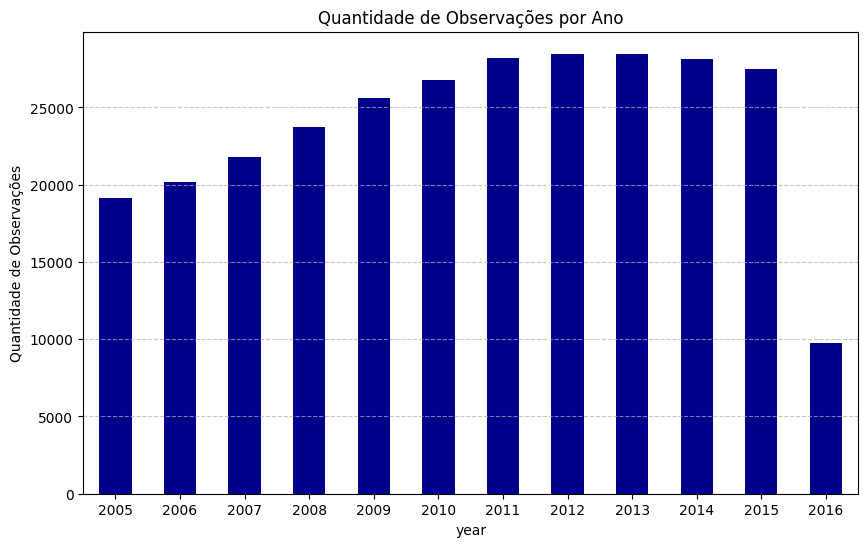

In [77]:
contagem_anos = df['year'].value_counts().sort_index()

df_2016 = df[df['year'] == 2016]
df_2016.sort_values('end', ascending=True)

plt.figure(figsize=(10, 6))
contagem_anos.plot(kind='bar', color='darkblue')
plt.title('Quantidade de Observações por Ano')
plt.xlabel('year')
plt.ylabel('Quantidade de Observações')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Podemos perceber uma diminuição muito grande na quantidade de dados nesse ano, porém se os dados forem confiáveis, podemos usa-los. Para isso iremos verificar se os dados coletados são do ano inteiro ou não:

In [81]:
# Filtrar o DataFrame para o ano 2016 e ordenar pela coluna 'end'
df_2016= df[df['year'] == 2016].sort_values(by='end', ascending=True)
df_2016.head(5)

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,company_age,revenue
212838,2.523700e+11,2015-08-01,2016-07-31,55044.445312,2.920900e+06,599729.625000,NaN,0.0,NaN,60040.742188,474848.156250,0.000000,7.178815e+05,6.260556e+05,4.152937e+06,1.247167e+06,NaN,6.405715e+06,2.319463e+06,11111.111328,60040.742188,0,365,0,2016,2001,2.0,1.0,0.0,NaN,1237.5,male,Foreign,2651.0,26.0,2.0,2,West,2001-09-25,4.854167,15,6.405715e+06
169395,1.596071e+11,2015-08-06,2016-08-05,0.000000,2.740741e+03,351.851837,NaN,0.0,NaN,0.000000,-1522.222168,0.000000,0.000000e+00,8.666667e+02,7.111111e+02,3.703704e+00,NaN,5.925926e+01,2.388889e+03,11111.111328,0.000000,0,365,0,2016,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.0,56.0,3.0,3,Central,2012-02-22,0.000000,4,5.925926e+01
100276,5.546036e+10,2015-09-01,2016-08-31,266662.062500,2.026535e+06,318386.562500,NaN,0.0,NaN,682889.187500,653458.312500,53890.496094,1.495103e+06,1.317034e+05,3.917838e+06,1.343768e+06,NaN,6.245202e+06,1.211212e+06,42804.542969,628998.687500,0,365,0,2016,1998,1.0,0.0,0.0,1976.0,2466.0,male,Domestic,2815.0,28.0,2.0,2,Central,1998-06-07,4.923611,18,6.245202e+06
138667,1.068467e+11,2015-09-01,2016-08-31,41618.519531,1.180830e+06,371644.437500,NaN,0.0,NaN,239303.703125,-218477.781250,259.259247,1.220000e+04,1.077159e+06,1.621859e+06,6.111037e+05,NaN,1.980267e+06,9.513926e+05,11111.111328,239044.437500,0,365,0,2016,1994,1.0,1.0,0.0,NaN,3673.0,male,Foreign,5629.0,56.0,3.0,1,Central,1994-02-14,5.104167,22,1.980267e+06
51976,1.500980e+10,2015-09-10,2016-09-09,0.000000,1.758333e+05,209640.734375,NaN,0.0,NaN,49329.628906,-54851.851562,0.000000,1.018518e+03,2.296296e+02,1.962963e+02,0.000000e+00,NaN,0.000000e+00,1.552222e+04,11111.111328,49329.628906,0,365,0,2016,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3320.0,33.0,2.0,2,East,2009-12-22,0.020833,7,0.000000e+00


 A partir da último nálise, podemos ver que os dados de 2016 nem sempre são do ano inteiro, não podendo ser usados para a próxima etapa, a criação da preditora. Aplicaremos a seguir a remoção das observações do ano de 2016

In [82]:
df = df[df['year'] != 2016]

### Criação da Variável de Predição

Nosso objetivo será predizer se uma empresa irá ou não deixar de operar futuramente.

**Definição:**
***Uma empresa vai deixar de operar se no ano X se ela está ativa (tem sales > 0), e não vendeu nos dois anos subsequentes(sales==0 em X+1 e sales==0 em X+2)***

Para fazer tal predição, precisamos ter dados de todos os anos, entre o primeiro e o ultimo ano, dessa empresa no banco de dados. Para isso, iremos criar linhas para os anos intermediários que estão faltando no banco de dados:  

In [83]:
#Para podermos criara a variavel preditora, precisamos ter todos os anos de uma dada empresa para assim dizer se ela faliu ou não.
# Sendo assim, vamos verificar qual o ano minimo e máximo de cada empresa

year_ranges = df.groupby('comp_id').agg({'year': ['min', 'max']})
year_ranges.columns = ['min_year', 'max_year']
year_ranges = year_ranges.reset_index()

# Criar uma função para gerar o range de anos para cada empresa
def year_range(row):
    # Arredondar os valores para o inteiro mais próximo
    min_year = round(row['min_year'])
    max_year = round(row['max_year'])

    # Retornar o range de anos
    return list(range(min_year, max_year + 1))

# Aplicar a função e criar o dataframe completo
year_ranges['years'] = year_ranges.apply(year_range, axis=1)
df_complete = year_ranges.explode('years').rename(columns={'years': 'year'})

# Mesclar com o dataframe original
df_final = pd.merge(df_complete[['comp_id', 'year']], df, on=['comp_id', 'year'], how='left')

# O merge já deixa como NaN por padrão aqueles que não têm dado
# Ordenar o dataframe final
df_final = df_final.sort_values(['comp_id', 'year'])

# Resetar o índice se necessário
df_final = df_final.reset_index(drop=True)

# Exibir o dataframe final
df_final.head()

,comp_id,year,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,founded_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,company_age,revenue
0,1001034.0,2005,2005-01-01,2005-12-31,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,1229.629639,218.518524,0.0,4355.555664,2911.111084,38222.222656,22222.222656,62.962963,62751.851562,881.481506,1388.888916,1229.629639,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,15,62751.851562
1,1001034.0,2006,2006-01-01,2006-12-31,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,725.925903,996.296326,0.0,7225.925781,5896.296387,38140.742188,23844.445312,755.555542,64625.925781,1637.036987,1388.888916,725.925903,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,16,64625.925781
2,1001034.0,2007,2007-01-01,2007-12-31,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,1322.222168,570.370361,0.0,7951.852051,177.777771,40174.074219,22262.962891,0.000000,65100.000000,1633.333374,1388.888916,1322.222168,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,17,65100.000000
3,1001034.0,2008,2008-01-01,2008-12-31,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,1022.222229,714.814819,0.0,5233.333496,1392.592651,54274.074219,21107.408203,0.000000,78085.187500,1725.925903,1481.481445,1022.222229,0.0,365.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,18,78085.187500
4,1001034.0,2009,2009-01-01,2009-12-31,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,814.814819,-11044.444336,0.0,3259.259277,11.111111,41755.554688,13237.037109,-11074.074219,45388.890625,-9348.148438,1481.481445,814.814819,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,19,45388.890625


In [84]:
#Verificando se o código funcionou, checando o numero de NaN na coluna begin_year
linhas_nan = df_final[df_final['begin'].isna()]

# Exibir as linhas com NaN na coluna 'begin_year', já que essa coluna não apresentava nenhum NaN.
linhas_nan.head()

,comp_id,year,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,founded_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,company_age,revenue
42,1004012.0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN
151,1089520.0,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN
239,1263652.0,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN
240,1263652.0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN
241,1263652.0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN


#### *Regra de Decisão*

Para cada empresa da base, se a empresa está ativa no ano X:

1.   Tendo informação dos dois anos seguintes
  * Se a empresa vendeu **em pelo menos 1 ano**
      - **A empresa continua operando**
 * Se não
      - **A empresa deixou de operar**
2.   Tendo informação somente do próximo ano
  * Se a empresa vendeu no próximo
      - Ela já vendeu em pelo menos um, logo **a empresa continua operando**
  * Se não
      - A empresa não vendeu em X+1 mas poderia vender X+2, logos não temos informação suficiente para classificar essa observação.   
3.   Só tendo informação do ano da linha: não temos informação de X+1 e X+2
     - Não temos como classificar essa observação

As empresas que não estão ativas ou sem informações suficientes para classificação não serão usadas para a modelagem


In [85]:
# Criando a coluna com a variável "Deixou de Operar"
#Caso os proximos dois anos tiverem alguma venda, retorna 0, caso contrário, 1
#Caso aquele ano só tenha mais um operando depois, e tiver vendas, retorna 0, caso contrário, retorna NaN.
#Se aquele for o ultimo ano daquela empresa, retorna NaN
def deixou_de_operar(row, df_final):
    # Obter os próximos dois anos de vendas
    next_two_years = df_final[(df_final['comp_id'] == row['comp_id']) & (df_final['year'] > row['year'])].head(2)

    # Se houver dois anos seguintes
    if len(next_two_years) == 2:
        sales_values = next_two_years['sales'].values
        # Se ambos os anos seguintes tiverem sales = 0, a empresa deixou de operar (1)
        if all(s == 0 for s in sales_values):
            return 1
        # Caso contrário, a empresa não deixou de operar (0)
        else:
            return 0
    # Se houver menos de dois anos seguintes
    elif len(next_two_years) == 1:
        # Se o próximo ano tiver sales = 0, não sabemos o que aconteceu com a empresa (NaN)
        if next_two_years['sales'].values[0] == 0:
            return pd.NA
        # Se o próximo ano tiver sales > 0, a empresa não deixou de operar (0)
        else:
            return 0
    # Se não houver anos seguintes, retorna NaN
    else:
        return pd.NA

# Aplicar a função ao DataFrame
df_final['Deixou de operar'] = df_final.apply(lambda row: deixou_de_operar(row, df), axis=1)

# Exibir o DataFrame resultante
df_final.head(10)

,comp_id,year,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,founded_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,company_age,revenue,Deixou de operar
0,1001034.0,2005,2005-01-01,2005-12-31,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,1229.629639,218.518524,0.0,4355.555664,2911.111084,38222.222656,22222.222656,62.962963,62751.851562,881.481506,1388.888916,1229.629639,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,15,62751.851562,0
1,1001034.0,2006,2006-01-01,2006-12-31,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,725.925903,996.296326,0.0,7225.925781,5896.296387,38140.742188,23844.445312,755.555542,64625.925781,1637.036987,1388.888916,725.925903,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,16,64625.925781,0
2,1001034.0,2007,2007-01-01,2007-12-31,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,1322.222168,570.370361,0.0,7951.852051,177.777771,40174.074219,22262.962891,0.000000,65100.000000,1633.333374,1388.888916,1322.222168,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,17,65100.000000,0
3,1001034.0,2008,2008-01-01,2008-12-31,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,1022.222229,714.814819,0.0,5233.333496,1392.592651,54274.074219,21107.408203,0.000000,78085.187500,1725.925903,1481.481445,1022.222229,0.0,365.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,18,78085.187500,0
4,1001034.0,2009,2009-01-01,2009-12-31,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,814.814819,-11044.444336,0.0,3259.259277,11.111111,41755.554688,13237.037109,-11074.074219,45388.890625,-9348.148438,1481.481445,814.814819,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,19,45388.890625,0
5,1001034.0,2010,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,637.037048,-7548.147949,0.0,0.000000,192.592590,10996.295898,5081.481445,-7548.147949,9929.629883,-16896.296875,1481.481445,637.037048,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,20,9929.629883,1
6,1001034.0,2011,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,481.481476,-1570.370361,0.0,0.000000,1633.333374,200.000000,225.925919,-1570.370361,0.000000,-18466.666016,1481.481445,481.481476,0.0,364.0,0.0,1990,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,21,0.000000,1
7,1001034.0,2012,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,340.740753,-2474.073975,0.0,0.000000,25.925926,1862.963013,285.185181,-2474.073975,0.000000,-20940.740234,1481.481445,340.740753,0.0,365.0,0.0,1990,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,22,0.000000,1
8,1001034.0,2013,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,200.000000,-614.814819,0.0,0.000000,37.037037,177.777771,296.296295,-633.333313,0.000000,-21574.074219,1481.481445,200.000000,0.0,364.0,0.0,1990,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,23,0.000000,1
9,1001034.0,2014,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,170.370377,-448.148163,0.0,0.000000,40.740742,114.814812,303.703705,-448.148163,0.000000,-22025.925781,1481.481445,170.370377,0.0,364.0,0.0,1990,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,24,0.000000,<NA>


Varificando se o código funcionou:

In [86]:
#Primeira validação:
df_final[['comp_id', 'year', 'sales', 'extra_inc', 'revenue', 'Deixou de operar']].head(20)

,comp_id,year,sales,extra_inc,revenue,Deixou de operar
0,1001034.0,2005,62751.851562,0.000000,62751.851562,0
1,1001034.0,2006,64625.925781,0.000000,64625.925781,0
2,1001034.0,2007,65100.000000,0.000000,65100.000000,0
3,1001034.0,2008,78085.187500,0.000000,78085.187500,0
4,1001034.0,2009,45388.890625,0.000000,45388.890625,0
5,1001034.0,2010,9929.629883,0.000000,9929.629883,1
6,1001034.0,2011,0.000000,0.000000,0.000000,1
7,1001034.0,2012,0.000000,0.000000,0.000000,1
8,1001034.0,2013,0.000000,0.000000,0.000000,1
9,1001034.0,2014,0.000000,0.000000,0.000000,<NA>


Agora vamos restaurar o df original, retirando as linhas que foram criadas para a criação da preditora. Para isso iremos retirar todas as linhas que tenham "begin" com NaN.

In [87]:
#Restaurando o data frame original, retirando as colunas que foram inseridas para criar a variável preditora:
#Eliminando todas as linhas com NaN em begin
df_inicial = df_final.dropna(subset=['begin'], how='all')

In [105]:
df_inicial

,comp_id,year,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,founded_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,company_age,revenue,Deixou de operar
0,1.001034e+06,2005,2005-01-01,2005-12-31,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,1229.629639,218.518524,0.0,4355.555664,2911.111084,38222.222656,22222.222656,62.962963,62751.851562,881.481506,1388.888916,1229.629639,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,15,62751.851562,0
1,1.001034e+06,2006,2006-01-01,2006-12-31,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,725.925903,996.296326,0.0,7225.925781,5896.296387,38140.742188,23844.445312,755.555542,64625.925781,1637.036987,1388.888916,725.925903,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,16,64625.925781,0
2,1.001034e+06,2007,2007-01-01,2007-12-31,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,1322.222168,570.370361,0.0,7951.852051,177.777771,40174.074219,22262.962891,0.000000,65100.000000,1633.333374,1388.888916,1322.222168,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,17,65100.000000,0
3,1.001034e+06,2008,2008-01-01,2008-12-31,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,1022.222229,714.814819,0.0,5233.333496,1392.592651,54274.074219,21107.408203,0.000000,78085.187500,1725.925903,1481.481445,1022.222229,0.0,365.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,18,78085.187500,0
4,1.001034e+06,2009,2009-01-01,2009-12-31,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,814.814819,-11044.444336,0.0,3259.259277,11.111111,41755.554688,13237.037109,-11074.074219,45388.890625,-9348.148438,1481.481445,814.814819,0.0,364.0,0.0,1990,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,19,45388.890625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282068,4.641209e+11,2011,2011-01-01,2011-12-31,0.000000,1807.407349,3.703704,0.0,0.0,0.0,0.000000,25.925926,0.0,0.000000,1807.407349,37.037037,225.925919,22.222221,288.888885,1803.703735,1111.111084,0.000000,0.0,364.0,0.0,1990,1.0,0.0,1.0,NaN,8187.0,female,Domestic,5510.0,55.0,3.0,2.0,East,1990-08-22,NaN,21,288.888885,1
282069,4.641209e+11,2012,2012-01-01,2012-12-31,0.000000,1518.518555,96.296295,0.0,0.0,0.0,0.000000,-381.481476,0.0,0.000000,1518.518555,96.296295,285.185181,-381.481476,0.000000,1422.222168,1111.111084,0.000000,0.0,365.0,0.0,1990,1.0,0.0,1.0,NaN,8187.0,female,Domestic,5510.0,55.0,3.0,2.0,East,1990-08-22,NaN,22,0.000000,1
282070,4.641209e+11,2013,2013-01-01,2013-12-31,0.000000,988.888916,77.777779,0.0,0.0,0.0,0.000000,-511.111115,0.0,0.000000,966.666687,207.407410,296.296295,-511.111115,0.000000,911.111084,1111.111084,0.000000,0.0,364.0,0.0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.0,55.0,3.0,2.0,East,1990-08-22,NaN,23,0.000000,1
282071,4.641209e+11,2014,2014-01-01,2014-12-31,0.000000,644.444458,233.333328,0.0,0.0,0.0,0.000000,-500.000000,0.0,0.000000,618.518494,200.000000,303.703705,-500.000000,0.000000,411.111115,1111.111084,0.000000,0.0,364.0,0.0,1990,1.0,0.0,1.0,1942.0,1441.0,female,Domestic,5510.0,55.0,3.0,2.0,East,1990-08-22,NaN,24,0.000000,<NA>


### Análise da variável resposta
Antes de seguir com os próximos passos, queremos verificar quais as % da variável resposta. Para isso iremos plotar um gráfico com respostas 0 (não faliu) e 1 (faliu).

<Figure size 1000x600 with 0 Axes>

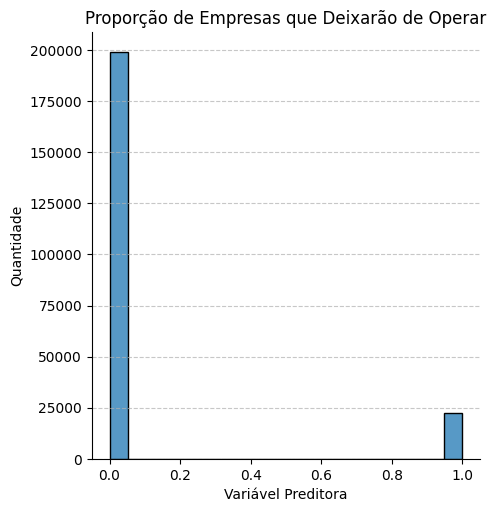

In [88]:
plt.figure(figsize=(10, 6))
sns.displot(df_inicial, x='Deixou de operar')
plt.title('Proporção de Empresas que Deixarão de Operar')
plt.xlabel('Variável Preditora')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A partir do gráfico, percebemos que temos aproximadamente 10% de empresas que faliram, sendo esse um numero bem pequeno.
Como um dos requisitos é usar o ano de 2012, iremos fazer um filtro para usar o ano de 2012.

In [106]:
#Criando um data frame só com o ao de 2012
df_2012 = df_inicial[df_inicial.year == 2012]

In [107]:
df_2012

,comp_id,year,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,founded_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,company_age,revenue,Deixou de operar
7,1.001034e+06,2012,2012-01-01,2012-12-31,140.740738,1.481481e+02,2.142963e+04,0.000000,0.0,0.000000,340.740753,-2474.073975,0.0,0.000000,25.925926,1.862963e+03,2.851852e+02,-2474.073975,0.000000e+00,-20940.740234,1481.481445,340.740753,0.0,365.0,0.0,1990,2.0,0.0,0.500000,1954.000000,4895.500000,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,22,0.000000e+00,1
14,1.001541e+06,2012,2012-01-01,2012-12-31,481.481476,9.629630e+03,1.303704e+03,0.000000,0.0,0.000000,190566.671875,-7696.296387,0.0,0.000000,9048.148438,8.351852e+03,0.000000e+00,-7722.222168,1.203704e+03,191262.968750,200740.734375,190566.671875,0.0,365.0,0.0,2008,1.0,0.0,0.000000,1974.000000,3222.000000,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,4,1.203704e+03,0
23,1.002029e+06,2012,2012-01-01,2012-12-31,14929.629883,2.038852e+05,1.204445e+05,0.000000,0.0,0.000000,23459.259766,11818.518555,0.0,677.777771,15077.777344,9.842704e+05,4.103704e+04,9722.222656,1.136515e+06,93144.445312,11111.111328,23459.259766,0.0,365.0,0.0,2006,2.0,0.0,0.000000,1975.000000,3101.000000,male,Domestic,2711.0,27.0,2.0,3.0,East,2006-07-03,0.458333,6,1.136515e+06,0
34,1.003200e+06,2012,2012-01-01,2012-12-31,25.925926,2.222222e+01,1.099630e+04,0.000000,0.0,0.000000,0.000000,-2337.037109,0.0,0.000000,22.222221,1.933333e+03,1.355556e+03,-2340.740723,2.785185e+03,-23785.185547,1851.851807,0.000000,0.0,365.0,0.0,2003,2.0,0.0,1.000000,NaN,1754.000000,female,Domestic,5630.0,56.0,3.0,1.0,Central,2003-10-21,NaN,9,2.785185e+03,<NA>
48,1.007261e+06,2012,2012-01-01,2012-12-31,0.000000,2.555556e+02,9.207407e+03,0.000000,0.0,0.000000,0.000000,-4670.370605,0.0,0.000000,255.555557,0.000000e+00,4.670371e+03,-4670.370605,0.000000e+00,-8951.851562,1851.851807,0.000000,0.0,365.0,0.0,2010,1.0,0.0,0.000000,1962.000000,1539.000000,male,Domestic,5610.0,56.0,3.0,1.0,Central,2010-08-26,0.083333,2,0.000000e+00,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282026,4.639820e+11,2012,2012-01-01,2012-12-31,16337.037109,3.140000e+04,8.300000e+03,0.000000,0.0,0.000000,113266.656250,-51051.851562,0.0,0.000000,6233.333496,1.621000e+05,5.798518e+04,-51351.851562,1.908296e+05,136014.812500,11111.111328,113266.656250,0.0,365.0,0.0,1995,1.0,0.0,0.000000,1957.000000,7902.000000,male,Domestic,2822.0,28.0,2.0,1.0,Central,1995-05-14,0.548611,17,1.908296e+05,0
282036,4.640212e+11,2012,2012-01-01,2012-12-31,3566.666748,3.149630e+04,1.783704e+04,0.000000,0.0,0.000000,31707.408203,462.962952,0.0,11048.148438,1151.851807,3.088889e+04,2.700000e+03,259.259247,3.804815e+04,45400.000000,11111.111328,31707.408203,0.0,365.0,0.0,2006,1.0,0.0,0.000000,NaN,1221.000000,male,Domestic,2822.0,28.0,2.0,2.0,Central,2006-05-09,0.083333,6,3.804815e+04,0
282044,4.640446e+11,2012,2012-01-01,2012-12-31,76059.257812,4.776548e+06,1.297552e+06,0.000000,0.0,0.000000,286355.562500,944962.937500,0.0,797422.250000,145655.562500,6.009589e+06,1.272256e+06,148781.484375,8.533974e+06,631777.750000,92592.593750,286355.562500,0.0,365.0,0.0,2008,1.0,1.0,0.000000,NaN,2943.000000,male,Foreign,3312.0,33.0,2.0,3.0,Central,2008-10-09,1.840278,4,8.533974e+06,0
282059,4.641050e+11,2012,2012-01-01,2012-12-31,1311.111084,3.261481e+04,1.104815e+04,22.222221,0.0,-22.222221,8125.925781,422.222229,0.0,4337.037109,14940.741211,9.646296e+04,6.410370e+04,207.407410,1.548778e+05,29833.333984,11111.111328,8125.925781,0.0,365.0,0.0,1989,3.0,0.0,0.666667,1951.666626,2076.666748,mix,D

Observando o novo data frame, podemos ver que existem valores NaN na coluna "Deixou de operar", o que não é interessante, dado que isso não nos traz a resposta que buscamos. Por esse motivo, vamos retirar essa variável

In [111]:
df_2012 = df_2012.dropna(subset=['Deixou de operar'])

df_2012

,comp_id,year,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,founded_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,company_age,revenue,Deixou de operar
7,1.001034e+06,2012,2012-01-01,2012-12-31,140.740738,1.481481e+02,2.142963e+04,0.000000,0.000000,0.000000,340.740753,-2474.073975,0.000000,0.000000,25.925926,1.862963e+03,2.851852e+02,-2474.073975,0.000000e+00,-2.094074e+04,1481.481445,340.740753,0.0,365.0,0.0,1990,2.0,0.0,0.500000,1954.000000,4895.500000,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,0.083333,22,0.000000e+00,1
14,1.001541e+06,2012,2012-01-01,2012-12-31,481.481476,9.629630e+03,1.303704e+03,0.000000,0.000000,0.000000,190566.671875,-7696.296387,0.000000,0.000000,9048.148438,8.351852e+03,0.000000e+00,-7722.222168,1.203704e+03,1.912630e+05,200740.734375,190566.671875,0.0,365.0,0.0,2008,1.0,0.0,0.000000,1974.000000,3222.000000,male,Domestic,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,4,1.203704e+03,0
23,1.002029e+06,2012,2012-01-01,2012-12-31,14929.629883,2.038852e+05,1.204445e+05,0.000000,0.000000,0.000000,23459.259766,11818.518555,0.000000,677.777771,15077.777344,9.842704e+05,4.103704e+04,9722.222656,1.136515e+06,9.314445e+04,11111.111328,23459.259766,0.0,365.0,0.0,2006,2.0,0.0,0.000000,1975.000000,3101.000000,male,Domestic,2711.0,27.0,2.0,3.0,East,2006-07-03,0.458333,6,1.136515e+06,0
56,1.011889e+06,2012,2012-01-01,2012-12-31,36625.925781,1.601667e+05,1.891111e+04,0.000000,0.000000,0.000000,933574.062500,96751.851562,1537.036987,11866.666992,131766.671875,2.046593e+05,9.261481e+04,96751.851562,4.336667e+05,1.071011e+06,17481.482422,932037.062500,0.0,365.0,0.0,1992,1.0,0.0,0.000000,1946.000000,6198.000000,male,Domestic,5510.0,55.0,3.0,2.0,West,1992-11-09,1.621212,20,4.336667e+05,0
67,1.014183e+06,2012,2012-01-01,2012-12-31,12551.851562,1.999037e+05,8.274074e+03,0.000000,7.407407,7.407407,118229.632812,-1429.629639,0.000000,0.000000,18585.185547,6.674445e+04,5.571111e+04,-2351.851807,1.297296e+05,3.098852e+05,11111.111328,118229.632812,0.0,365.0,0.0,2001,1.0,0.0,0.000000,1946.000000,3594.000000,male,Domestic,5510.0,55.0,3.0,2.0,Central,2001-12-21,0.715278,11,1.297370e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282026,4.639820e+11,2012,2012-01-01,2012-12-31,16337.037109,3.140000e+04,8.300000e+03,0.000000,0.000000,0.000000,113266.656250,-51051.851562,0.000000,0.000000,6233.333496,1.621000e+05,5.798518e+04,-51351.851562,1.908296e+05,1.360148e+05,11111.111328,113266.656250,0.0,365.0,0.0,1995,1.0,0.0,0.000000,1957.000000,7902.000000,male,Domestic,2822.0,28.0,2.0,1.0,Central,1995-05-14,0.548611,17,1.908296e+05,0
282036,4.640212e+11,2012,2012-01-01,2012-12-31,3566.666748,3.149630e+04,1.783704e+04,0.000000,0.000000,0.000000,31707.408203,462.962952,0.000000,11048.148438,1151.851807,3.088889e+04,2.700000e+03,259.259247,3.804815e+04,4.540000e+04,11111.111328,31707.408203,0.0,365.0,0.0,2006,1.0,0.0,0.000000,NaN,1221.000000,male,Domestic,2822.0,28.0,2.0,2.0,Central,2006-05-09,0.083333,6,3.804815e+04,0
282044,4.640446e+11,2012,2012-01-01,2012-12-31,76059.257812,4.776548e+06,1.297552e+06,0.000000,0.000000,0.000000,286355.562500,944962.937500,0.000000,797422.250000,145655.562500,6.009589e+06,1.272256e+06,148781.484375,8.533974e+06,6.317778e+05,92592.593750,286355.562500,0.0,365.0,0.0,2008,1.0,1.0,0.000000,NaN,2943.000000,male,Foreign,3312.0,33.0,2.0,3.0,Central,2008-10-09,1.840278,4,8.533974e+06,0
282059,4.641050e+11,2012,2012-01-01,2012-12-31,1311.111084,3.261481e+04,1.104815e+04,22.222221,0.000000,-22.222221,8125.925781,422.222229,0.000000,4337.037109,14940.741211,9.646296e+04,6.410370

<Figure size 1000x600 with 0 Axes>

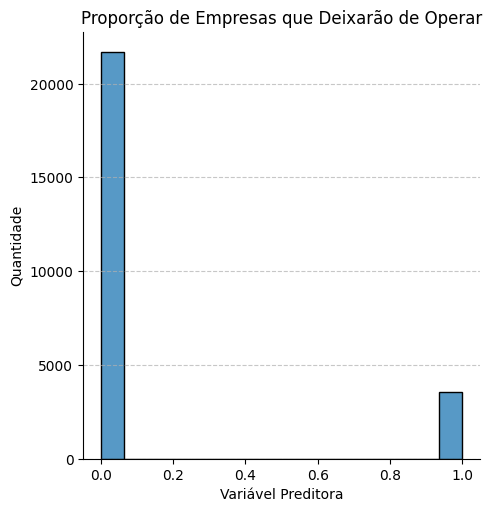

In [110]:
plt.figure(figsize=(10, 6))
sns.displot(df_2012, x='Deixou de operar')
plt.title('Proporção de Empresas que Deixarão de Operar')
plt.xlabel('Variável Preditora')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [114]:
# Verificando a % de 0s e 1s coluna "Deixou de Operar"
quantidade_0 = (df_2012['Deixou de operar'] == 0).sum()
quantidade_1 = (df_2012['Deixou de operar'] == 1).sum()

# Exibir os resultados
print(f"não faliram: {quantidade_0}")
print(f"faliram: {quantidade_1}")

# Calcular o total de registros
total = quantidade_0 + quantidade_1

# Calcular as porcentagens
porcentagem_0 = (quantidade_0 / total) * 100
porcentagem_1 = (quantidade_1 / total) * 100

print(f"\nPorcentagem que não faliu: {porcentagem_0:.2f}%")
print(f"Porcentagem que faliu: {porcentagem_1:.2f}%")

não faliram: 21675
faliram: 3535

Porcentagem que não faliu: 85.98%
Porcentagem que faliu: 14.02%


Usando o data frame somente com o ano de 2012, temos uma porcentagem um pouco maior do que no data frame inteiro. Por isso usaremos somente o ano de 2012 para seguir com as análises.

### Filtrando a receita
Como requisito do projeto, precisamos filtrar as empresas que tenham tido vendas entre 1000 e 10 milhoes de euros.

In [115]:
df_filtrado = df_2012[(df_2012['revenue'] >= 1000) & (df_2012['revenue'] <= 10000000)]

### Últimas tratativas

Ainda precisamos buscar por inconsistencias, como valores negativos e NaN's.

In [116]:
#Veroficando os valores negativos:
print(check_neg(df_filtrado))

                   Valores Negativos  Porcentagem (%)
profit_loss_year                8839        44.080391
inc_bef_tax                     8792           43.846
share_eq                        7013        34.974067
extra_profit_loss               1268         6.323559
company_age                       34         0.169559
liq_assets                        27          0.13465
curr_liab                         10          0.04987
curr_assets                        9         0.044883
amort                              5         0.024935
personnel_exp                      5         0.024935
material_exp                       4         0.019948
extra_exp                          3         0.014961
inventories                        3         0.014961
intang_assets                      2         0.009974


Olhando para a base de dados, percebemos que algumas variáveis apresentavam valores negativos. Sabendo que apenas 4 delas poderiam ser negativas (profit_loss_year, inc_bef_tax, share_eq e extra_profit_loss) e que as demais apresentavam uma pequena porcentagem de negativos, resolvemos retirar essas linhas.

In [117]:
#Vamos eliminar as linhas com valores negativos das colunas que não podem ter dados negativos.
#Começamos criando uma variável com as colunas que não podems ser negativas:
colunas_nao_negativas = [
    'company_age', 'liq_assets', 'curr_liab', 'curr_assets',
    'amort', 'personnel_exp', 'material_exp', 'extra_exp',
     'inventories', 'intang_assets'
]

In [120]:
df_filtrado = df_filtrado[df_filtrado[colunas_nao_negativas].ge(0).all(axis=1)]


In [121]:
#Verificando se os negativos de interesse foram retirados:
print(check_neg(df_filtrado))

                   Valores Negativos  Porcentagem (%)
profit_loss_year                8786        44.095358
inc_bef_tax                     8735        43.839398
share_eq                        6977        35.016311
extra_profit_loss               1251         6.278545


Agora que só temos os negativos possíveis, iremos verificar a quantidade de linhas com NaN's.

In [122]:
print(check_nan_all_columns(df_filtrado))

                      contagem_nan porcentagem_nan           Dtype
birth_year                    4200          21.08%         float64
labor_avg                     2851          14.31%         float64
foreign                       1747           8.77%         float64
ceo_count                     1747           8.77%         float64
origin                        1747           8.77%          object
gender                        1747           8.77%          object
inoffice_days                 1747           8.77%         float64
female                        1747           8.77%         float64
ind                            615           3.09%         float64
region_m                        57           0.29%          object
company_age                      2           0.01%           Int64
founded_date                     2           0.01%  datetime64[ns]
founded_year                     2           0.01%           Int64
nace_main                        1           0.01%         flo

Algumas delas, como origin, cao_count, foreign, female, inoffice_days e gender, apresentam exatamente a mesma quantidade de missings e, por esse motivo,decidimos eliminar essas linha por não acharmos que os dados dessas linhas serão confiáveis (já que para essa linhas vários dados estavam faltando). Valores de missing abaixo da porcentagem das variáveis acima, também foram eleiminados por serem muito baixos.

In [123]:
#Eliminando as linhas com NaN na coluna ceo_count
df_filtrado = df_filtrado.dropna(subset=['ceo_count'])

In [124]:
print(check_nan_all_columns(df_filtrado))

                      contagem_nan porcentagem_nan           Dtype
labor_avg                     2492          13.71%         float64
birth_year                    2453          13.49%         float64
ind                            554           3.05%         float64
region_m                        50           0.28%          object
company_age                      2           0.01%           Int64
founded_date                     2           0.01%  datetime64[ns]
founded_year                     2           0.01%           Int64
comp_id                          0            0.0%         float64
inoffice_days                    0            0.0%         float64
balsheet_notfullyear             0            0.0%         float64
ceo_count                        0            0.0%         float64
foreign                          0            0.0%         float64
female                           0            0.0%         float64
nace_main                        0            0.0%         flo

In [125]:
#Por só apresentar 3 linhas com valores com NaN nas colunas com company age, foundade_date e founded_year, essas serão aliminadas

df_filtrado = df_filtrado.dropna(subset=['company_age'])

In [126]:
print(check_nan_all_columns(df_filtrado))

                      contagem_nan porcentagem_nan           Dtype
labor_avg                     2492          13.71%         float64
birth_year                    2452          13.49%         float64
ind                            554           3.05%         float64
region_m                        50           0.28%          object
comp_id                          0            0.0%         float64
gender                           0            0.0%          object
balsheet_notfullyear             0            0.0%         float64
founded_year                     0            0.0%           Int64
ceo_count                        0            0.0%         float64
foreign                          0            0.0%         float64
female                           0            0.0%         float64
inoffice_days                    0            0.0%         float64
nace_main                        0            0.0%         float64
origin                           0            0.0%          ob

Temos agora birth_year e labor_avg com uma porcentagem considerável de dados faltantes. Para analisar isso, vamos fazer um box plot de birth year e Deixou de operar:

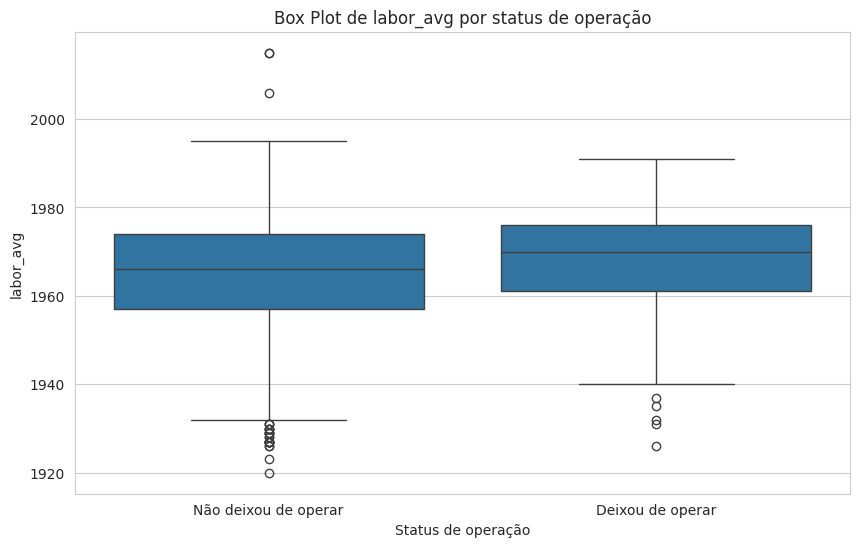

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo do Seaborn
sns.set_style("whitegrid")

# Criar a figura
plt.figure(figsize=(10, 6))

# Criar o box plot
sns.boxplot(x='Deixou de operar', y='birth_year', data=df_filtrado)

# Adicionar título e rótulos
plt.title('Box Plot de labor_avg por status de operação')
plt.xlabel('Status de operação')
plt.ylabel('labor_avg')

# Ajustar os rótulos do eixo x
plt.xticks([0, 1], ['Não deixou de operar', 'Deixou de operar'])

# Mostrar o gráfico
plt.show()

Ao fazer um box plot da variável birth_year, percebemos que a distribuição dessa variável com a variável resposta não parece ter relação, logo resolvemos eliminar essa coluna.

Além disso, olhando para os outros missinga e para o gráfico de correlação (inicio do projeto), é possível notar que birth_year tem baixa correlação com as demais variáveis e a variável labor_avg tem uma alta correlação com personel_exp, que possui alta taxa de preenchimento, por isso acreditamos que a exclusão da variável "labor_avg" não irá acarretar prejuízo para o modelo preditivo.

Podemos verificar também que as variáveis classificatórias de ind, ind2 e nace_main possuem alta correlação por se tratarem da mesma informação com granularidades diferentes. Por isso, iremos eiminar as coluna de nace_main e ind.  

Além dessas, algumas outras colunas não trazem informações relevantes para a nossa preditora (como comp_id, year, begin, end, balsheet_flag, balsheet_length, balsheet_notfullyear, nace_main, founded_date) e por isso também serão eliminas.

In [129]:
#Eliminado colunas
df_filtrado = df_filtrado.drop(columns=['birth_year','labor_avg',
                                        'comp_id','year','begin','end','balsheet_flag',
                                        'balsheet_length','balsheet_notfullyear','nace_main','founded_date','ind'])

### Tratando dados assimétricos:

Por fim, iremos análisar e tratar os dados assimétricos para podermos criar o conjunto de dados que será usado no R. Para isso faremos histogramas desses dados:

<Figure size 1000x600 with 0 Axes>

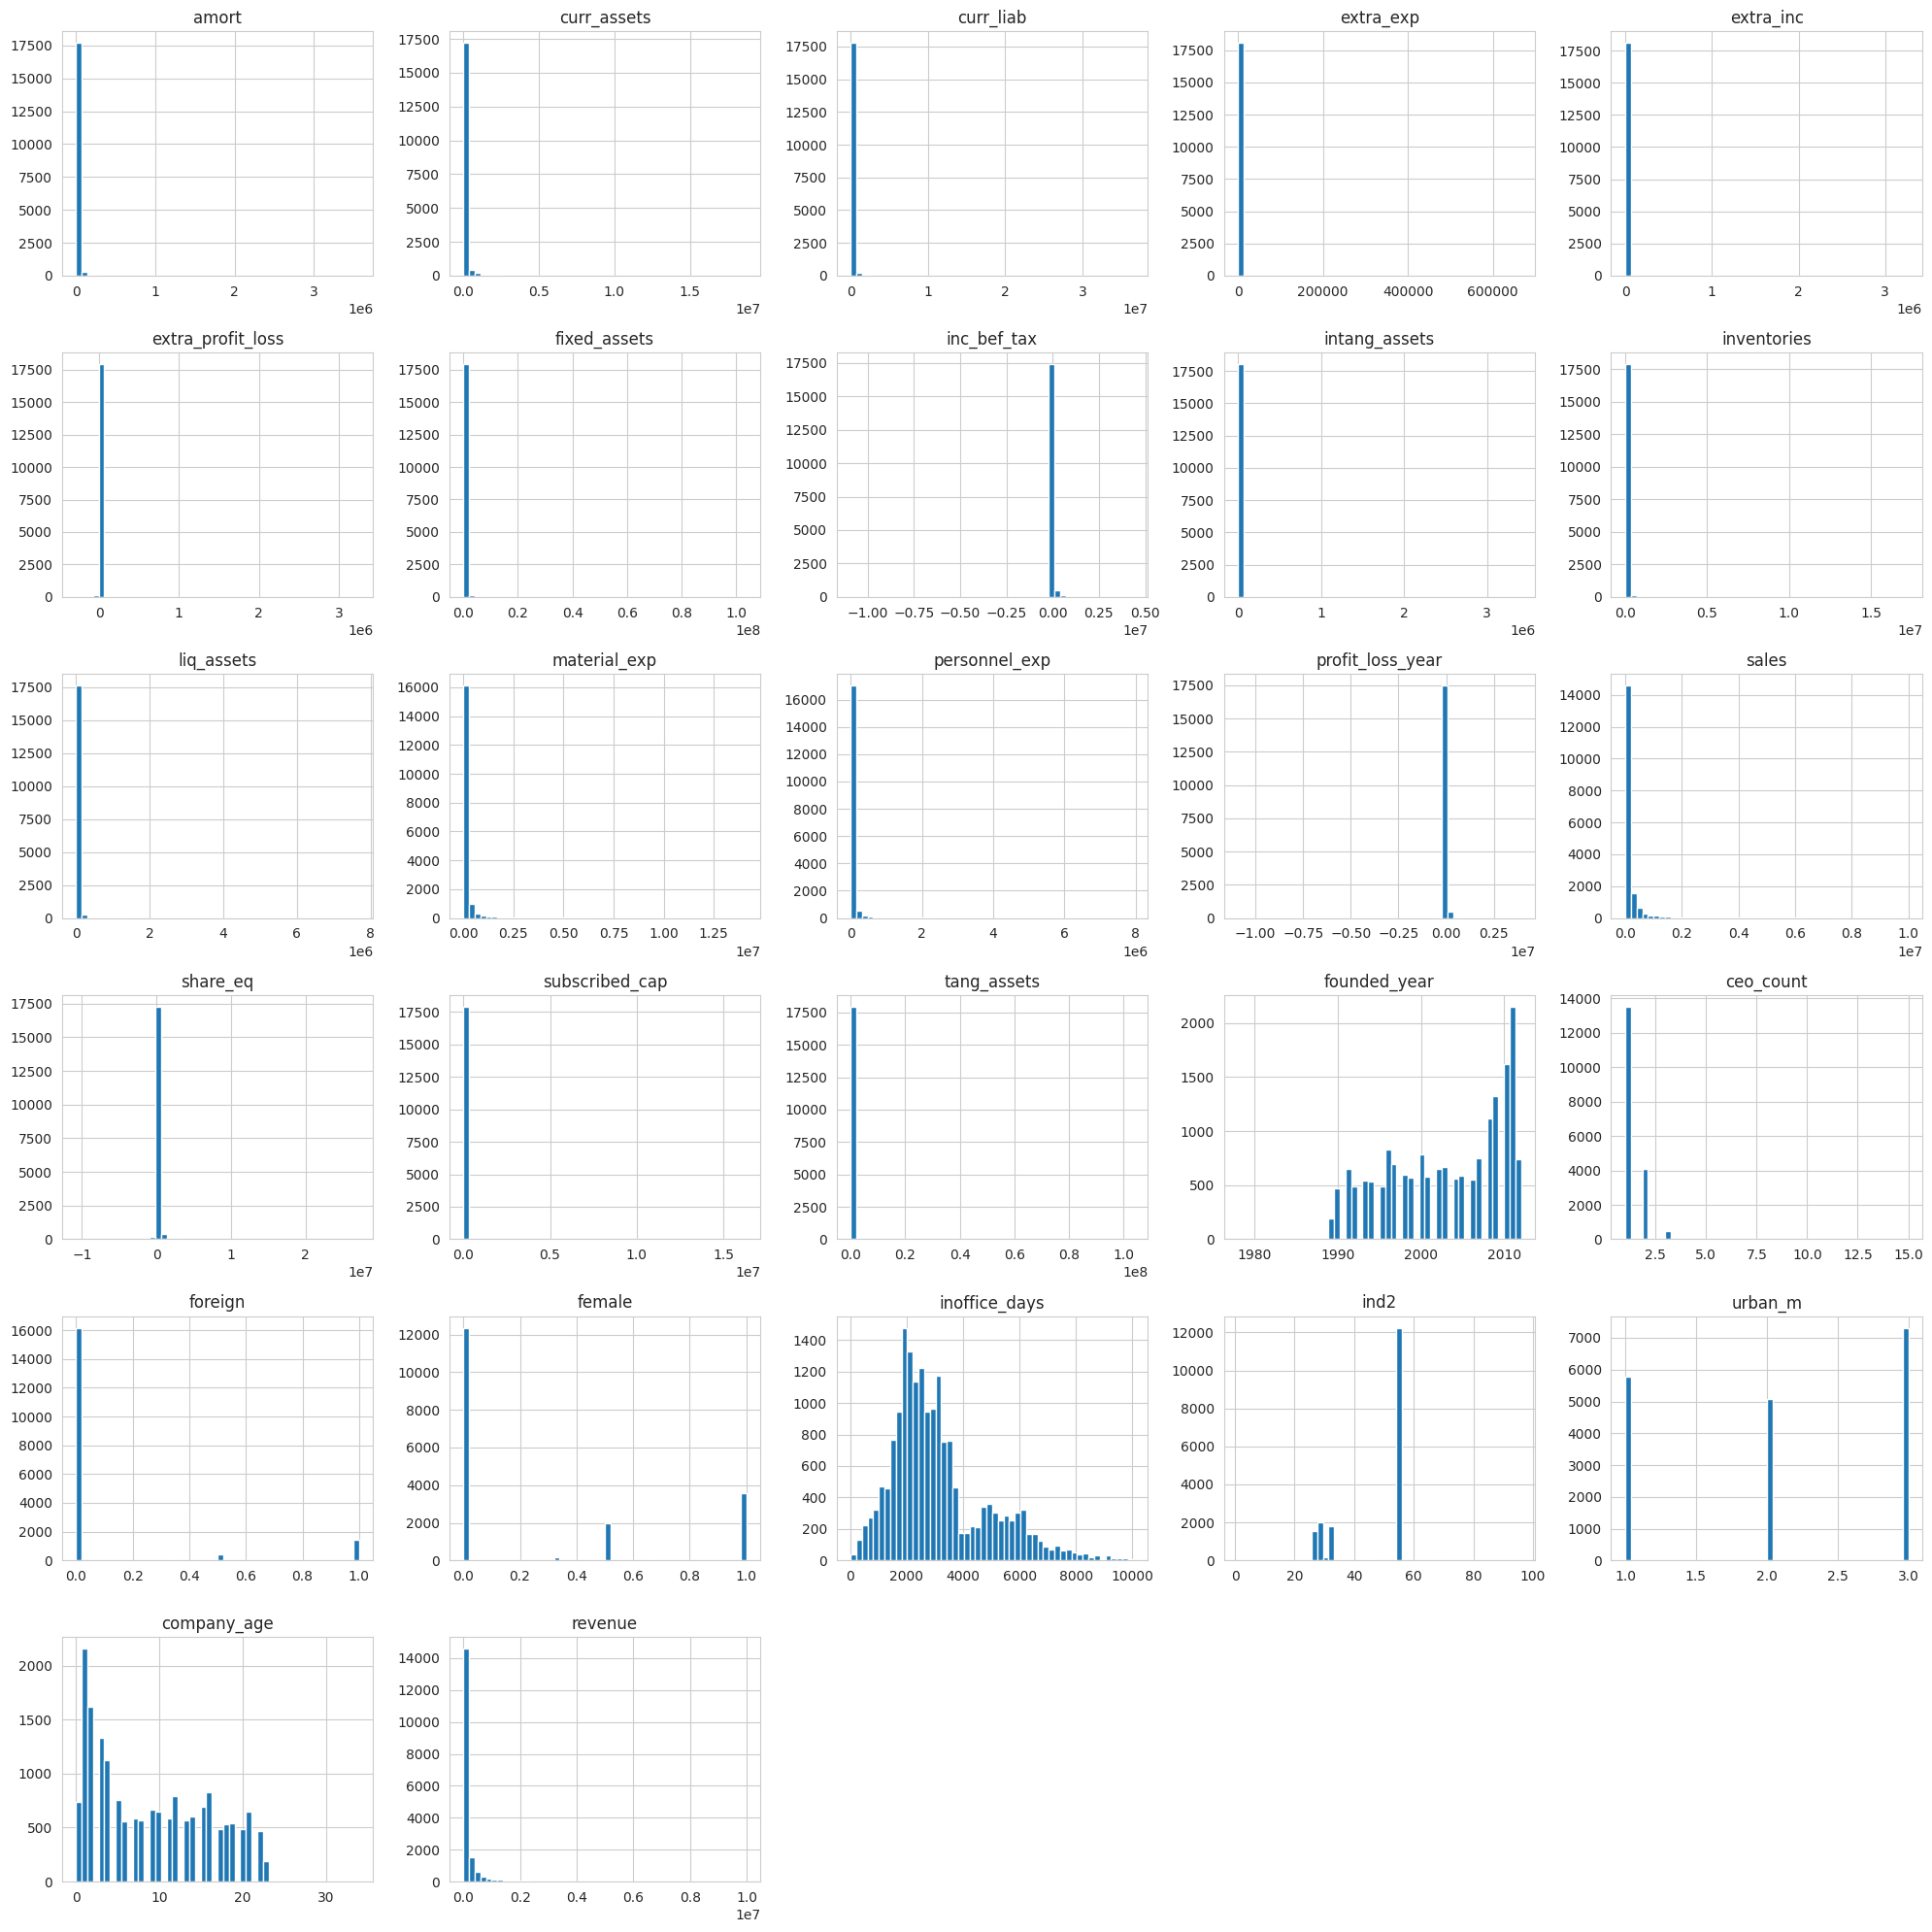

In [131]:
# Fazendo histogramas para investigar assimetrias
plt.figure(figsize=(10, 6))

df_filtrado.hist(figsize=(20, 20), bins=50)
plt.tight_layout()
plt.show()


Analisando os dados, podemos visualizar que muitos dos valores financeiros estão altamente concentrados, por isso iremos aplicar o logaritmo e o arco seno hiperbólico (nas variáveis que podem conter valores negativos) para melhorar a distribuíção dos valores nas mesmas

In [133]:
df_filtrado['asinh_profit_loss_year'] = np.arcsinh(df_filtrado['profit_loss_year'])
df_filtrado['asinh_inc_bef_tax'] = np.arcsinh(df_filtrado['inc_bef_tax'])
df_filtrado['asinh_share_eq'] = np.arcsinh(df_filtrado['share_eq'])
df_filtrado['asinh_extra_profit_loss'] = np.arcsinh(df_filtrado['extra_profit_loss'])

#Como há muitas observações com valor 0, somaremos 1 as observações apenas no calculo do logaritmo
df_filtrado['log_liq_assets'] = np.log(df_filtrado['liq_assets'] + 1)
df_filtrado['log_curr_liab'] = np.log(df_filtrado['curr_liab']+ 1)
df_filtrado['log_amort'] = np.log(df_filtrado['amort']+ 1)
df_filtrado['log_extra_exp'] = np.log(df_filtrado['extra_exp']+ 1)
df_filtrado['log_personnel_exp'] = np.log(df_filtrado['personnel_exp']+ 1)
df_filtrado['log_curr_assets'] = np.log(df_filtrado['curr_assets']+ 1)
df_filtrado['log_material_exp'] = np.log(df_filtrado['material_exp']+ 1)
df_filtrado['log_extra_inc'] = np.log(df_filtrado['extra_inc']+ 1)
df_filtrado['log_intang_assets'] = np.log(df_filtrado['intang_assets']+ 1)
df_filtrado['log_fixed_assets'] = np.log(df_filtrado['fixed_assets']+ 1)
df_filtrado['log_inventories'] = np.log(df_filtrado['inventories']+ 1)
df_filtrado['log_revenue'] = np.log(df_filtrado['revenue']+ 1)
df_filtrado['log_tang_assets'] = np.log(df_filtrado['tang_assets']+ 1)
df_filtrado['log_subscribed_cap'] = np.log(df_filtrado['subscribed_cap']+ 1)
df_filtrado['log_sales'] = np.log(df_filtrado['sales']+ 1)

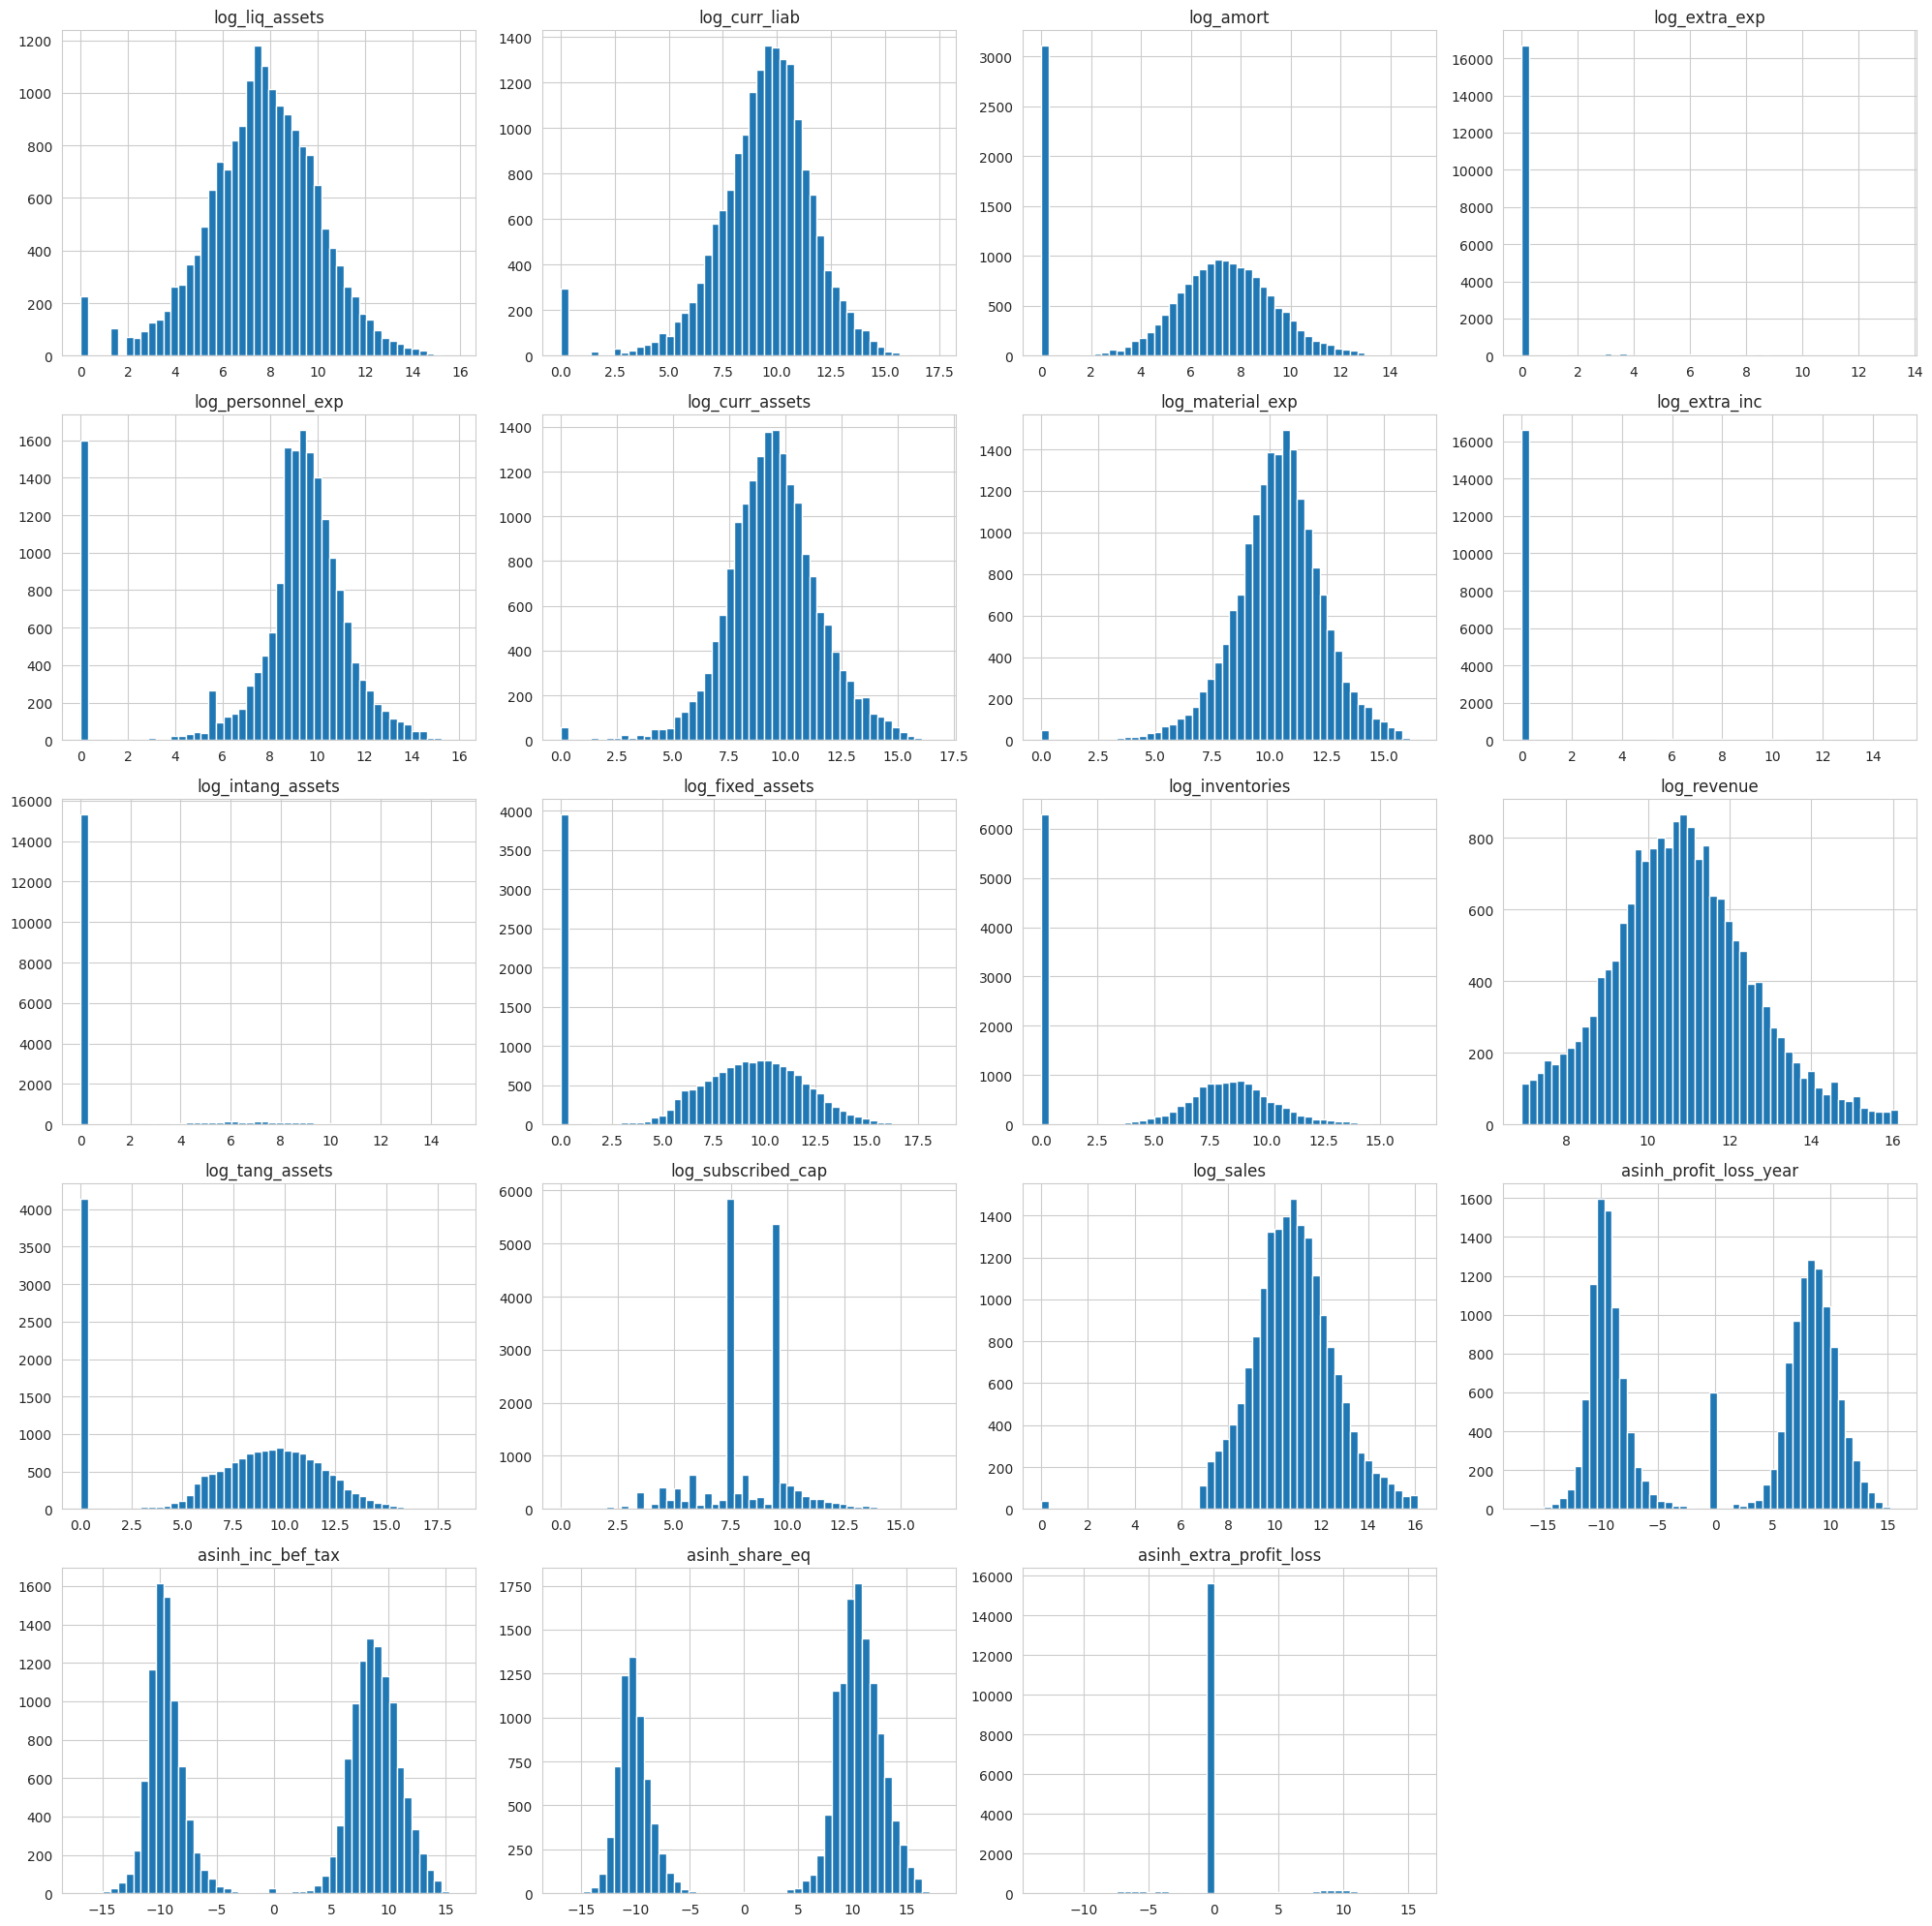

In [134]:
df_filtrado[['log_liq_assets', 'log_curr_liab', 'log_amort', 'log_extra_exp','log_personnel_exp', 'log_curr_assets', 'log_material_exp', 'log_extra_inc',
            'log_intang_assets', 'log_fixed_assets', 'log_inventories', 'log_revenue','log_tang_assets', 'log_subscribed_cap', 'log_sales','asinh_profit_loss_year',
            'asinh_inc_bef_tax','asinh_share_eq','asinh_extra_profit_loss']].hist(figsize=(20, 20), bins=50)

plt.tight_layout()
plt.show()

In [135]:
# Obtendo o número de linhas e colunas do df
linhas, colunas = df_filtrado.shape
print(f"O DataFrame tem {linhas} linhas e {colunas} colunas.")

O DataFrame tem 18176 linhas e 50 colunas.


##### Extração de Dados para Modelagem:

In [136]:
df_filtrado.to_csv('dados_R.csv', index=False)

# Modelagem e Análise Preditiva

https://htmlpreview.github.io/?https://github.com/eduardoao4/MeuRepositorioPublico/blob/main/Projeto-integrador-Markdown.html